<h1 style="color:blue">Simulation Project Part 6</h1>
<h1>Mohammad Saeed Zare Mehrjardi - 99243037</h1>
<h1>Zahra Sadat Esmati Baygi - 99243053 </h1>

In [31]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr
import seaborn as sns
import pandas as pd

# Sample k-Regular Graph

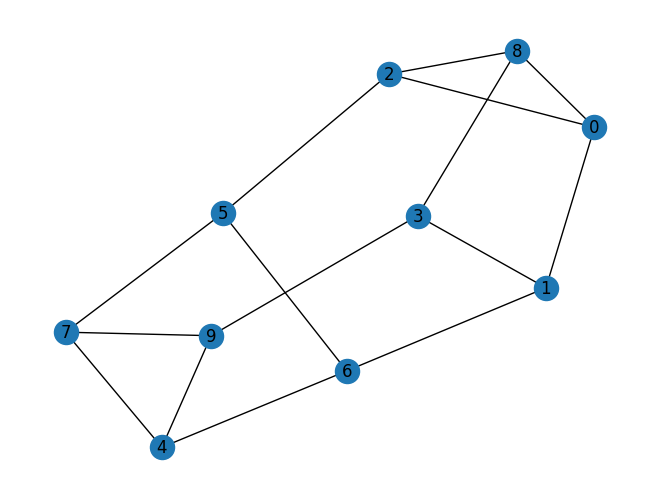

In [32]:
n = 10
d = 3
seed = 60

rg = nx.random_regular_graph(d, n, seed)

nx.draw(rg, with_labels=True)
plt.show()

# Compate two sets of Graph (RSRBG vs K-Regular)
## N = 496 , average degree = 6

# Create 1000 k-regular graph dataset 

In [33]:
# create dataset of 6-regular graph with size 500 (1000 graphs)
number_of_simulation = 50
n = 496
d = 6
seed = 60

reg_graphs = []
rg_degrees = []
rg_eigens = []
for _ in range(number_of_simulation):
    rg = nx.random_regular_graph(d, n, seed)
    
    rg_degrees += [d for n, d in rg.degree()]
    rg_eigens += gr.complex_abs(gr.adjacency_eigen_values(rg))
    
    reg_graphs.append(rg)

### Degree Distribution

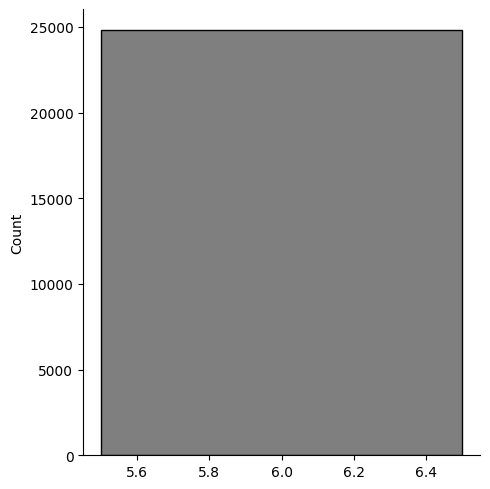

In [34]:
sns.displot(rg_degrees, kde=True, color="black")

### Eigen Values Distribution

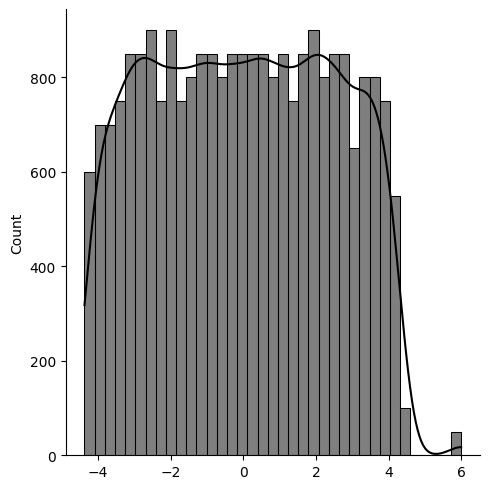

In [35]:
sns.displot(rg_eigens, kde=True, color="black")

### Calculate Probability of inconsistency

In [ ]:
table = []

# cut from 1 to 50 %
for cut in range(1, 50):
    disconnected = 0
    
    for reg in reg_graphs:
        reg_copy = reg.copy()
        n = len(list(reg_copy.edges()))
        number_of_cuts = (cut * n) / 100
        
        nc = 0
        ec = 0
        ac = 0
        
        for _ in range(int(number_of_cuts)):
            if len(list(reg_copy.edges())) > 0:
                selected = random.choice(list(reg_copy.edges()))
                reg_copy.remove_edge(selected[0], selected[1])
                
        
        nc += nx.node_connectivity(reg_copy)
        ec += nx.edge_connectivity(reg_copy)
        ac += gr.algebraic_connectivity(reg_copy)
        
        connected = True
        if not nx.is_connected(reg_copy):
            connected = False 
            disconnected += 1
        
        
            
    print(disconnected)
    p = disconnected / len(reg_graphs)
    
    table.append([cut, number_of_cuts, disconnected, p, nc/len(reg_graphs), ec/len(reg_graphs), ac/len(reg_graphs)])
        
        

0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
2
1
0
6
3


In [ ]:
df = pd.DataFrame(table, columns=['cut(%)', 'number of cuts', 'number of disconnected', 'possibility of inconsistency',
                                 'node connectivity', 'edge connectivity', 'algebratic connectivity'])
df

In [ ]:
c = df['cut(%)']
p = df['possibility of inconsistency']
plt.plot(c, p)

plt.ylabel("possibility of inconsistency")
plt.xlabel("cuts(%)")

# Create 1000 RSRBG graph dataset

In [ ]:
# create dataset of 6-regular graph with size 500 (1000 graphs)
number_of_simulation = 50
n = 496
d1 = 4
d2 = 12

rsrbg_graphs = []
rsrbg_degrees = []
rsrbg_eigens = []
for _ in range(number_of_simulation):
    rsrbg = gr.RSRBG(n, d1, d2)[0]
    
    rsrbg_degrees += [d for n, d in rsrbg.degree()]
    rsrbg_eigens += gr.complex_abs(gr.adjacency_eigen_values(rsrbg))
    
    rsrbg_graphs.append(rsrbg)

### RSRBG Degree Distribution

In [ ]:
sns.displot(rsrbg_degrees, kde=True, color="black")

### RSRBG Eigen Values Distribution

In [ ]:
sns.displot(rsrbg_eigens, kde=True, color="black")

### Calculate Probability of inconsistency

In [ ]:
rsrbg_table = []

# cut from 1 to 50 %
for cut in range(1, 50):
    disconnected = 0
    
    for reg in rsrbg_graphs:
        reg_copy = reg.copy()
        n = len(list(reg_copy.edges()))
        number_of_cuts = (cut * n) / 100
        
        nc = 0
        ec = 0
        ac = 0
        
        for _ in range(int(number_of_cuts)):
            if len(list(reg_copy.edges())) > 0:
                selected = random.choice(list(reg_copy.edges()))
                reg_copy.remove_edge(selected[0], selected[1])
        
        nc += nx.node_connectivity(reg_copy)
        ec += nx.edge_connectivity(reg_copy)
        ac += gr.algebraic_connectivity(reg_copy)
                
        
        connected = True
        if not nx.is_connected(reg_copy):
            connected = False 
            disconnected += 1
            
    print(disconnected)
    p = disconnected / len(reg_graphs) 
    rsrbg_table.append([cut, number_of_cuts, disconnected, p, nc/len(rsrbg_graphs), ec/len(rsrbg_graphs), ac/len(rsrbg_graphs)])

In [ ]:
rdf = pd.DataFrame(rsrbg_table, columns=['cut(%)', 'number of cuts', 'number of disconnected', 'possibility of inconsistency'])
rdf

In [ ]:
c = rdf['cut(%)']
p = rdf['possibility of inconsistency']
plt.plot(c, p)

plt.ylabel("possibility of inconsistency")
plt.xlabel("cuts(%)")